In [45]:
import numpy as np 
import h5py 
from lr_utils import load_dataset
import matplotlib.pyplot as plt
from PIL import Image

In [46]:
train_x_orig,train_y,test_x_orig,test_y,classes=load_dataset()

In [47]:
print(train_x_orig.shape,test_x_orig.shape,test_y.shape,train_y.shape,classes.shape)

(209, 64, 64, 3) (50, 64, 64, 3) (1, 50) (1, 209) (2,)


In [48]:
train_x_flatten=train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_x_flatten=test_x_orig.reshape(test_x_orig.shape[0],-1).T
print(train_x_flatten.shape,test_x_flatten.shape)

(12288, 209) (12288, 50)


In [49]:
train_x=train_x_flatten/255.
test_x=test_x_flatten/255.
print(train_x,test_x)

[[0.06666667 0.76862745 0.32156863 ... 0.56078431 0.08627451 0.03137255]
 [0.12156863 0.75294118 0.27843137 ... 0.60784314 0.09411765 0.10980392]
 [0.21960784 0.74509804 0.26666667 ... 0.64705882 0.09019608 0.20784314]
 ...
 [0.         0.32156863 0.54117647 ... 0.33333333 0.01568627 0.        ]
 [0.         0.31372549 0.55294118 ... 0.41960784 0.01960784 0.        ]
 [0.         0.31764706 0.55686275 ... 0.58431373 0.         0.        ]] [[0.61960784 0.45098039 1.         ... 0.16078431 0.07058824 0.52156863]
 [0.40784314 0.43137255 0.99215686 ... 0.18431373 0.07058824 0.63921569]
 [0.3254902  0.43529412 0.99607843 ... 0.32941176 0.0627451  0.29411765]
 ...
 [0.67843137 0.67058824 0.52156863 ... 0.71764706 0.56470588 0.01960784]
 [0.50196078 0.69019608 0.39607843 ... 0.55294118 0.5372549  0.08627451]
 [0.43137255 0.72941176 0.4745098  ... 0.45490196 0.42352941 0.01960784]]


In [50]:
def sigmoid(z):

    x=1/(1+np.exp(-z))

    return x

sigmoid(0)

def intialisation_of_zeros(dim):

    w=np.zeros((dim,1))
    b=0.

    return w,b

intialisation_of_zeros(2)

(array([[0.],
        [0.]]),
 0.0)

In [51]:
def loss_grad(X,Y,w,b):

    m=X.shape[1]
    a=sigmoid(np.dot(w.T,X)+b)
    loss=-1/m*np.sum(Y*np.log(a)+(1-Y)*np.log(1-a))

    dw=1/m*np.dot(X,(a-Y).T)
    db=1/m*np.sum(a-Y)

    grad={"dw":dw,
        "db":db}

    return grad , loss 

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
loss_grad(X,Y,w,b)

({'dw': array([[0.99845601],
         [2.39507239]]),
  'db': 0.001455578136784208},
 5.801545319394553)

In [52]:
def fiterate(X,Y,w,b,no_of_iteration,learning_rate):

    for i in range(no_of_iteration):

        grad,loss=loss_grad(X,Y,w,b)

        dw=grad["dw"]
        db=grad["db"]

        w=w-(learning_rate*dw)
        b=b-(learning_rate*db)

    paras={"w":w,
           "b":b}
        
    grad={"dw":dw,
          "db":db}
        
    return paras,grad,loss

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
paras, grad, loss = fiterate(X, Y, w, b, no_of_iteration= 100, learning_rate = 0.009)

print ("w = " + str(paras["w"]))
print ("b = " + str(paras["b"]))
print ("dw = " + str(grad["dw"]))
print ("db = " + str(grad["db"]))
print ("costs = ", loss)

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657
costs =  1.0784313398164707


In [53]:
def sambhavna(X,w,b):

    m=X.shape[1]
    a=sigmoid(np.dot(w.T,X)+b)
    # print(a)
    y_tred=np.zeros((1,m))

    y_tred=np.where(a>0.5,1,0)

    return y_tred

w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(sambhavna(X,w,b)))

predictions = [[1 1 0]]


In [54]:
def model(train_x,train_y,test_x,test_y,no_of_iteration,learning_rate,print_cost=True):

    w,b=intialisation_of_zeros(train_x.shape[0])
    paras,grad,loss=fiterate(train_x,train_y,w,b,no_of_iteration,learning_rate)

    w=paras["w"]
    b=paras["b"]

    Y_prediction_train=sambhavna(train_x,w,b)
    Y_prediction_test=sambhavna(test_x,w,b)

    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - train_y)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - test_y)) * 100))

    
    d = {"costs": loss,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": no_of_iteration}
    
    return d

In [55]:
logistic_regression_model = model(train_x, train_y, test_x, test_y, no_of_iteration=2000, learning_rate=0.005, print_cost=True)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 0, you predicted that it is a "non-cat" picture.


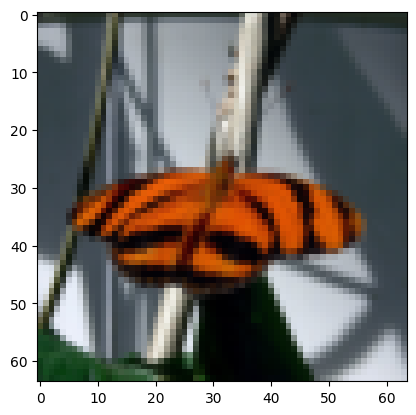

In [56]:
# Example of a picture that was wrongly classified.
index = 45
plt.imshow(test_x[:, index].reshape((64,64, 3)))
print ("y = " + str(test_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

[[0]]
y = 0, your algorithm predicts a "non-cat" picture.


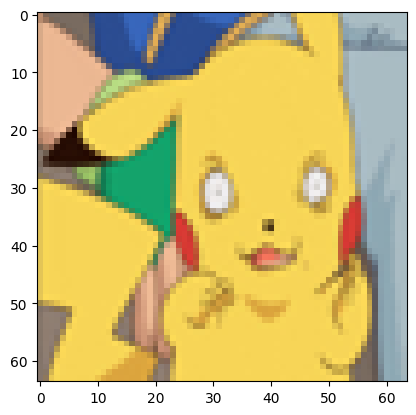

In [76]:
# change this to the name of your image file
my_image = "2.jpg"   

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(Image.open(fname).resize((64,64)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, 64 * 64 * 3)).T
my_predicted_image = sambhavna(image, logistic_regression_model["w"], logistic_regression_model["b"])
print(sambhavna(image, logistic_regression_model["w"], logistic_regression_model["b"]))
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")